In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
# from fit_functions import fit_unbinned_double_gauss_Z, fit_unbinned_gauss_Z_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

Welcome to JupyROOT 6.26/10


In [2]:
# dataset = '../outputs/ZeeYuu_Run3_Candidates.root'
dataset = 'ZeeYuu_data_TriggerOfficalL1_candidatesE.root'
file = up.open(dataset)

In [3]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb']
branches = events.arrays(columns)

In [4]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [5]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 185
Number of events Preselection: 1


In [6]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [7]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,9.369130e+07,89.363739,3.061542,154.673462,0.023001
1,2.287560e+08,85.022133,3.097248,115.709229,0.098942
2,5.215144e+08,88.879639,3.003065,124.509529,0.038508
3,1.433500e+07,78.385628,3.104422,147.544861,0.886299
4,1.398659e+09,89.902496,3.110225,129.449768,0.025473
...,...,...,...,...,...
180,1.308936e+09,99.635567,3.109635,131.257080,0.668556
181,6.102917e+08,89.661041,3.090606,113.678749,0.353997
182,1.188280e+09,93.947617,3.038684,127.329514,0.024242
183,1.283166e+08,104.651054,3.168974,132.904282,0.795534


In [8]:
# duplicated events
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event')

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
101,135680448.0,86.453445,3.059877,131.999771,0.083810
102,135680448.0,85.526733,3.059877,128.194489,0.568402
120,507344992.0,92.809525,3.194561,141.800110,0.177834
121,507344992.0,92.809525,3.134586,140.447800,0.131910


In [9]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [10]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,9.369130e+07,89.363739,3.061542,154.673462,0.023001
1,2.287560e+08,85.022133,3.097248,115.709229,0.098942
2,5.215144e+08,88.879639,3.003065,124.509529,0.038508
3,1.433500e+07,78.385628,3.104422,147.544861,0.886299
4,1.398659e+09,89.902496,3.110225,129.449768,0.025473
...,...,...,...,...,...
180,1.308936e+09,99.635567,3.109635,131.257080,0.668556
181,6.102917e+08,89.661041,3.090606,113.678749,0.353997
182,1.188280e+09,93.947617,3.038684,127.329514,0.024242
183,1.283166e+08,104.651054,3.168974,132.904282,0.795534


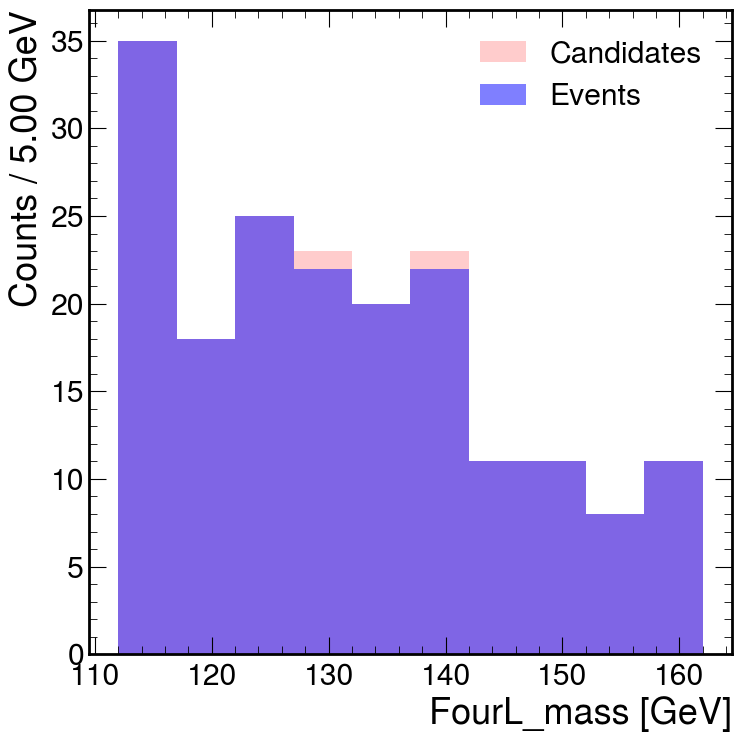

In [11]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 112, 162
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

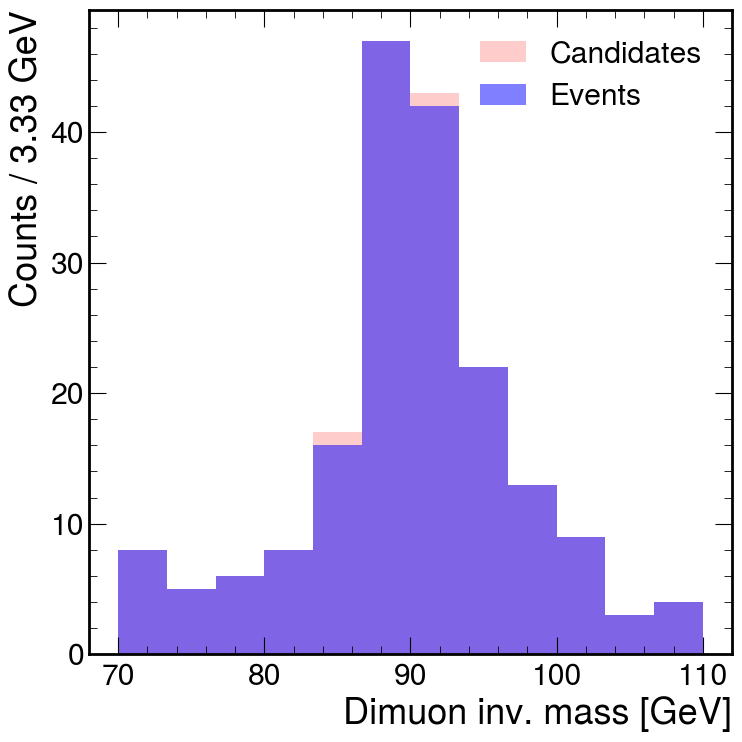

In [12]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 12, 70, 110
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

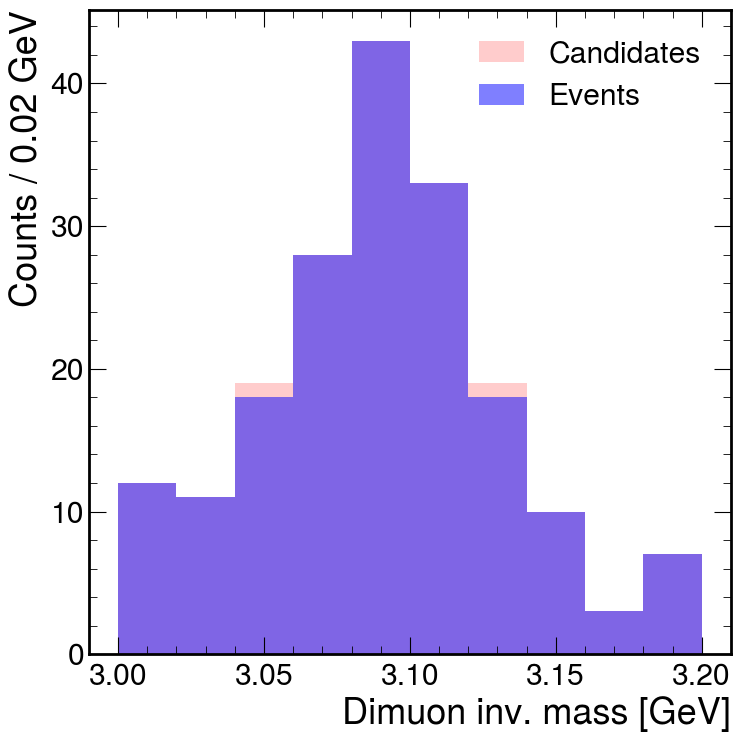

In [15]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 3.0, 3.2
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

In [24]:
# concatenate the muons
B_J_mass = ak.concatenate([branches['B_J1_mass'], branches['B_J2_mass'], branches['B_J3_mass'], branches['B_J4_mass']], axis=0)

In [25]:
nbins, xlow, xhigh = 100, 70, 110
B_J_mass_candidates = ak.flatten(B_J_mass).to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 413 out-of-range events


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        2.00000e+00  9.50000e-01    1.00000e-01

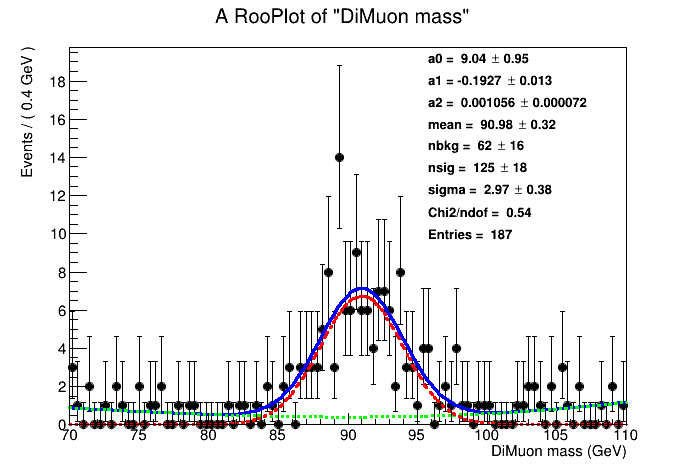

In [26]:
frame = fit_unbinned_gauss_Z_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()

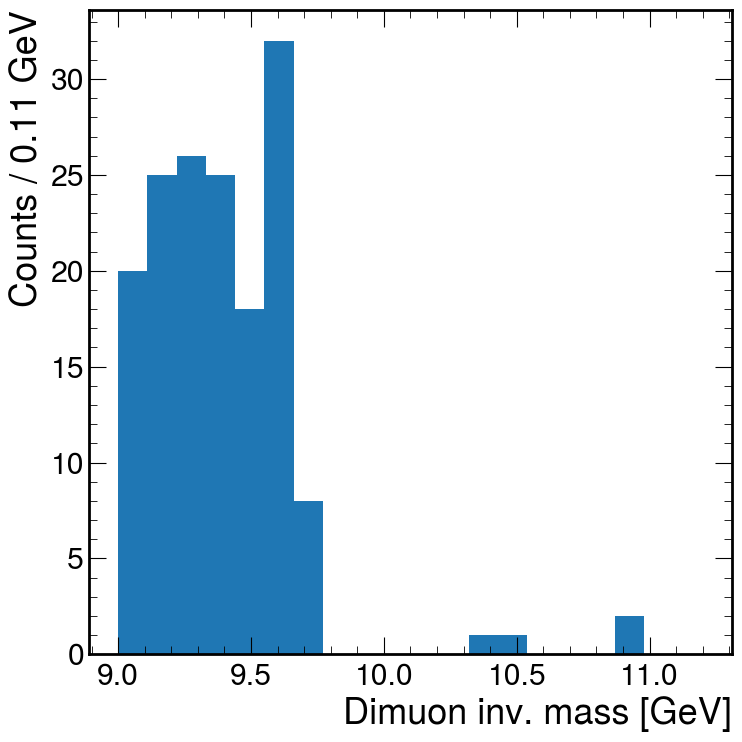

In [28]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 9, 11.2
plt.hist(ak.flatten(B_J_mass), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

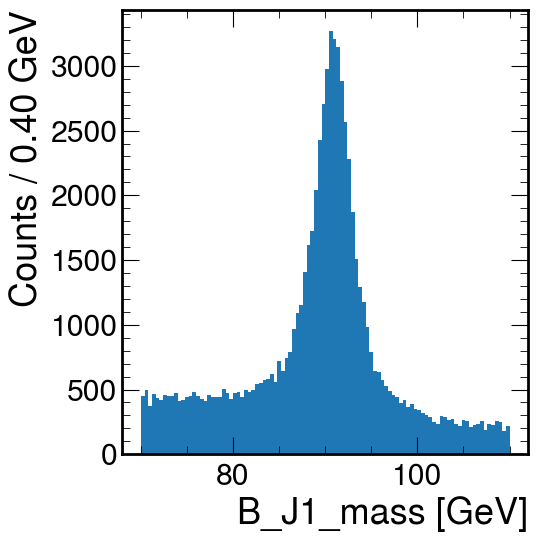

In [54]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 100, 70, 110
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()